Observations
Analysis of this random dataset of 500 cities and countries reveals a few details about how weather is affected as it relates to latitude and ultimately, distance from the equator. 
Clearly, max temperature is almost directly affected by distance from the equator. One factor not directly revealed by the data gathered in this observation is the slight skew of temperature to one hemisphere of the globe. This can be inferred as having to do with the tilt of the earth on its axis, generating more warmth on one hemisphere as compared to the other. In this case, the southern hemisphere is definitely showing warmer maximum temperatures, indicating the earth is tilted so the northern hemisphere is further from the sun.
Cloud cover has almost no relationship to distance from the equator, as the data show a randomly distributed scatterplot. This indicates a low correlation between the two factors. Wind speed is not directly affected by latitudinal position. Both comparisons in this respect do provide clear pictures of where a majority of the cities in the world sit on average and frequency in terms of wind speed and cloud cover.
Humidity also does not show a great deal of correlation as it relates to latitude. Because humidity is often strongly associated with distance from large bodies of water, and that the earth is over 70% water, it makes sense that the data skews to the higher end of the scale here.
Overall, geography as it relates to latitude does have an affect on the local weather, however given the small sample size in terms of time, the only clear direct relationship that can be inferred, in my opinion, are that temperature extremes depend a great deal on a city’s distance from the equator.


DEPENDENCIES

In [1]:
import json
import pandas as pd
import requests as req
import random
from citipy import citipy
import seaborn as sns
import csv
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)

CONFIG VARIABLES

In [2]:
api_key = "d3cfde203de9c80b7b1bab1e8e60ab91"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

GENERATING RANDOM LATITUDE AND LONGITUDE DATA

In [3]:
location = pd.DataFrame()
location['lat'] = pd.unique([np.random.uniform(-90,90) for x in range(1000)])
location['lon'] = pd.unique([np.random.uniform(-180, 180) for x in range(1000)])

location.head()

,lat,lon
0,53.995415,136.910796
1,1.827802,100.131317
2,-44.709328,86.839330
3,-4.456784,95.307876
4,55.583738,95.400485


ASSIGNING LAT AND LON TO CITY & COUNTRY ID WITH CITIPY

In [4]:
location['city'] = ""
location['country'] = ""

count = 0
for index, row in location.iterrows():
    city = citipy.nearest_city(row['lat'], row['lon']).city_name
    country = citipy.nearest_city(row['lat'], row['lon']).country_code
    location.set_value(index,"city",city)
    location.set_value(index,"country",country)
location.head()

,lat,lon,city,country
0,53.995415,136.910796,imeni poliny osipenko,ru
1,1.827802,100.131317,rantauprapat,id
2,-44.709328,86.839330,busselton,au
3,-4.456784,95.307876,padang,id
4,55.583738,95.400485,irbeyskoye,ru


In [5]:
len(location)

1000

CREATING LISTS

In [6]:
location['Max Temp'] = ""
location['Humidity'] = ""
location['Cloudiness'] = ""
location['Wind Speed'] = ""
location["Date"] = ""
location["ID"] = ""

In [7]:
location_clean = location.dropna()
location_clean = location.sample(n=500)
len(location_clean)

500

API LOOP & OUTPUT

In [8]:
api_call_count = 0

for index, row in location_clean.iterrows():
    city = row["city"]
    country = row["country"]
    query = url + "appid=" + api_key + "&units=" + units + "&q=" + city 
    

    try:
        response = req.get(query).json()
        latitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        date = response["dt"]
        temp = response["main"]["temp_max"]
        humid = response["main"]["humidity"]
        cloud = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        city_number = response["id"]
        location_clean.set_value(index,"Max Temp",temp)
        location_clean.set_value(index,"Cloudiness",cloud)
        location_clean.set_value(index,"Latitude",latitude)
        location_clean.set_value(index,"Longitude",longitude)
        location_clean.set_value(index,"Date",date)
        location_clean.set_value(index,"ID",city_number)
        location_clean.set_value(index,"Humidity",humid)
        location_clean.set_value(index,"Wind Speed",wind)
        print("Data Gathered for %s, %s, %s" % (city_number,city,query))
    except KeyError:
        print("Not Enough Info for %s, %s" % (city, country))
    api_call_count += 1
    if api_call_count % 50 == 0:
        time.sleep(60)


Data Gathered for 934322, mahebourg, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=mahebourg
Data Gathered for 1113217, zabol, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=zabol
Data Gathered for 3347019, namibe, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=namibe
Data Gathered for 4020109, atuona, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=atuona
Not Enough Info for vaitupu, wf
Data Gathered for 3874787, punta arenas, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=punta arenas
Data Gathered for 5606187, saint anthony, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=saint anthony
Data Gathered for 3833367, ushuaia, http://api.openweathermap.org/dat

Data Gathered for 2022572, khatanga, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=khatanga
Data Gathered for 3137469, sorland, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=sorland
Data Gathered for 3526756, isla mujeres, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=isla mujeres
Data Gathered for 1056151, mananjary, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=mananjary
Data Gathered for 3616584, san ramon, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=san ramon
Data Gathered for 1788852, xining, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=xining
Data Gathered for 1106677, bambous virieux, http://api.openweathermap.org/data/2.5/weather?appid=d3c

Data Gathered for 2163355, hobart, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=hobart
Data Gathered for 4030556, rikitea, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=rikitea
Data Gathered for 3833367, ushuaia, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=ushuaia
Data Gathered for 6201424, mataura, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=mataura
Data Gathered for 2171465, clarence town, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=clarence town
Data Gathered for 3453439, ponta do sol, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=ponta do sol
Data Gathered for 2023333, kachug, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203d

Data Gathered for 3833859, barrow, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=barrow
Data Gathered for 1733782, victoria, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=victoria
Data Gathered for 3372707, ribeira grande, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=ribeira grande
Data Gathered for 3521972, panaba, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=panaba
Data Gathered for 2155415, new norfolk, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=new norfolk
Not Enough Info for fatikchhari, bd
Data Gathered for 3874787, punta arenas, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=punta arenas
Data Gathered for 4372777, vardo, http://api.openwea

Data Gathered for 2136825, isangel, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=isangel
Data Gathered for 3833367, ushuaia, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=ushuaia
Data Gathered for 1254046, tura, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=tura
Not Enough Info for tapaua, br
Data Gathered for 2172880, byron bay, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=byron bay
Data Gathered for 344979, lebu, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=lebu
Not Enough Info for barentsburg, sj
Data Gathered for 3833367, ushuaia, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=ushuaia
Data Gathered for 3015546, gourdon, http://api.openweatherma

Data Gathered for 2194098, ahipara, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=ahipara
Data Gathered for 294117, avdon, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=avdon
Not Enough Info for belushya guba, ru
Data Gathered for 1855476, kushima, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=kushima
Data Gathered for 4470244, havelock, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=havelock
Data Gathered for 6165406, thompson, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=thompson
Data Gathered for 934322, mahebourg, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=mahebourg
Data Gathered for 2169535, dalby, http://api.openweathermap.org/data/2.5/weath

Data Gathered for 220448, aketi, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=aketi
Data Gathered for 6201424, mataura, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=mataura
Data Gathered for 608324, shetpe, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=shetpe
Data Gathered for 3369157, cape town, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=cape town
Data Gathered for 3833367, ushuaia, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=ushuaia
Not Enough Info for nizhneyansk, ru
Data Gathered for 2340451, gombe, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=gombe
Data Gathered for 2027042, batagay-alyta, http://api.openweathermap.org/data/2.5/weather?a

Data Gathered for 4030556, rikitea, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=rikitea
Data Gathered for 2163355, hobart, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=hobart
Data Gathered for 2063036, port lincoln, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=port lincoln
Data Gathered for 2075265, busselton, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=busselton
Data Gathered for 1633419, padang, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=padang
Data Gathered for 4030556, rikitea, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=rikitea
Data Gathered for 588365, vao, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e

Data Gathered for 2450173, taoudenni, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=taoudenni
Data Gathered for 4501427, port elizabeth, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=port elizabeth
Data Gathered for 1028434, quelimane, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=quelimane
Data Gathered for 2112802, hasaki, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=hasaki
Data Gathered for 2297810, mumford, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=mumford
Data Gathered for 6201424, mataura, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde203de9c80b7b1bab1e8e60ab91&units=Imperial&q=mataura
Data Gathered for 3424607, tasiilaq, http://api.openweathermap.org/data/2.5/weather?appid=d3cfde20

FORMATTING COLUMNS

In [9]:
location_clean["lat"] = location_clean["lat"].map("{0:.2f}".format)
location_clean["lon"] = location_clean["lon"].map("{0:.2f}".format)
location_clean["Humidity"] = pd.to_numeric(location_clean["Humidity"])
location_clean["Cloudiness"] = pd.to_numeric(location_clean["Cloudiness"])
location_clean["Date"] = pd.to_datetime(location_clean['Date'],unit='s')
location_clean = location_clean.dropna()
len(location_clean)

454

CLEAN DATA FOR EXPORT

In [10]:
location_final = location_clean[["city","Cloudiness","country",
                                 "Date","Humidity","lat","lon",
                                 "Max Temp","Wind Speed"]]
location_final.head()

,city,Cloudiness,country,Date,Humidity,lat,lon,Max Temp,Wind Speed
22,mahebourg,75.0,mu,2018-03-02 06:00:00,79.0,-40.78,76.92,84.2,16.11
734,zabol,0.0,ir,2018-03-02 06:00:00,56.0,31.61,60.25,68,6.93
428,namibe,20.0,ao,2018-03-02 06:36:30,100.0,-13.12,6.70,73.19,4.76
839,atuona,64.0,pf,2018-03-02 06:36:30,97.0,-3.31,-139.14,82.01,18.07
152,punta arenas,75.0,cl,2018-03-02 06:00:00,71.0,-72.38,-99.39,53.6,17.22


In [11]:
location_final.to_csv("weatherPyHWData.csv", encoding="utf-8", index=False,header=True)

CITY LATITUDE VS. MAX TEMPERATURE PLOT

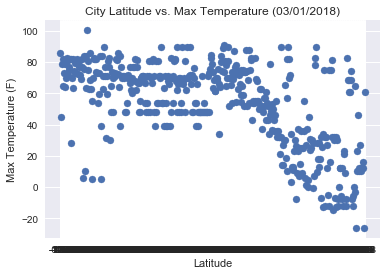

In [12]:
x_val = location_final["lat"]
y_val = location_final["Max Temp"]
plt.scatter(x_val,y_val)
plt.title("City Latitude vs. Max Temperature (03/01/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("latVsMaxTemp.png")
plt.show()


CITY LATITUDE VS. HUMIDITY PLOT

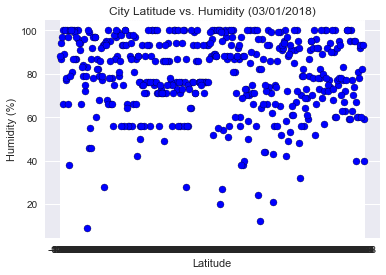

In [13]:
x_val = location_final["lat"]
y_val = location_final["Humidity"]
plt.scatter(x_val,y_val,color= 'blue', edgecolors = 'black', label = 'Lat vs. Humidity')
plt.title("City Latitude vs. Humidity (03/01/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("latVsHumidity.png")
plt.show()

CITY LATITUDE VS. CLOUDINESS PLOT

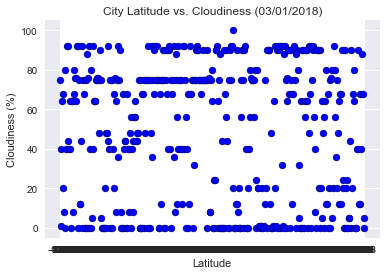

In [14]:
x_val = location_final["lat"]
y_val = location_final["Cloudiness"]
plt.scatter(x_val,y_val,color= 'blue', edgecolors = 'black', label = 'Lat vs. Cloudiness')
plt.title("City Latitude vs. Cloudiness (03/01/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("latVsCloudiness.png")
plt.show()

CITY LATITUDE VS. WIND SPEED PLOT

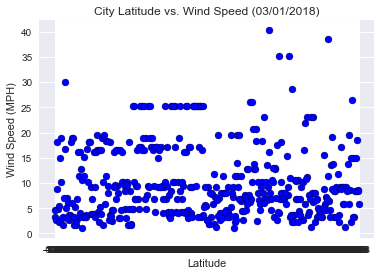

In [15]:
x_val = location_final["lat"]
y_val = location_final["Wind Speed"]
plt.scatter(x_val,y_val,color= 'blue', edgecolors = 'black', label = 'Lat vs. Wind Speed')
plt.title("City Latitude vs. Wind Speed (03/01/2018)")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.savefig("latVsWindSpeed.png")
plt.show()